In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import imblearn

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, balanced_accuracy_score, precision_recall_fscore_support, roc_curve, roc_auc_score
import time

In [2]:
#Ignorando avisos
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Formatação
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold= 15)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Fridge Data
- A geladeira possuí 2 dados específicos: `fridge_temperature` e `temp_condition`
- O conjunto de dados resultantes atenderá os seguintes requisitos para preenchimento de dados `NaN` * para dados númericos será utilizada a **`Média`** e para dados categóricos a **`Moda`**

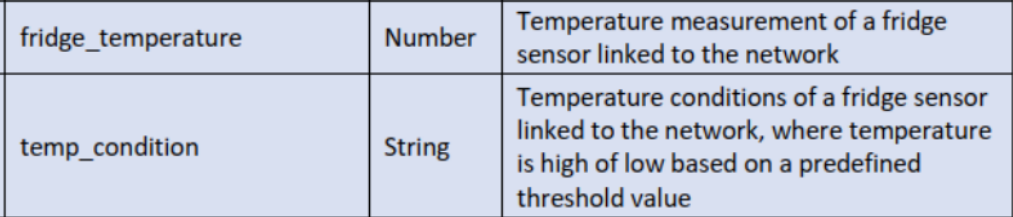

## Garage Door Data
- A porta da garagem possuí 2 dados específicos: `door_state` e `sphone_signal`, que são dois dados categóricos, logo será utilizada a `moda` para preenchimento dos espaços NaN no dataset resultante.

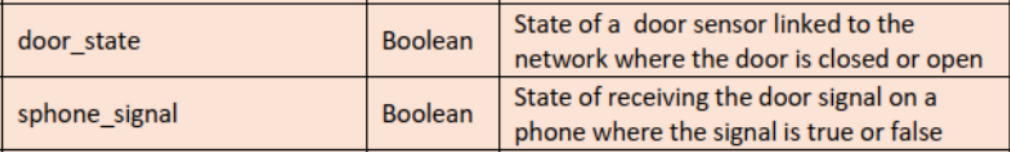

## GPS Data
- O GPS possuí 2 dados específicos: `latitude` e `longitude`, que são dois dados numéricos, logo será utilizada a `média` para preenchimento dos espaços NaN no dataset resultante.

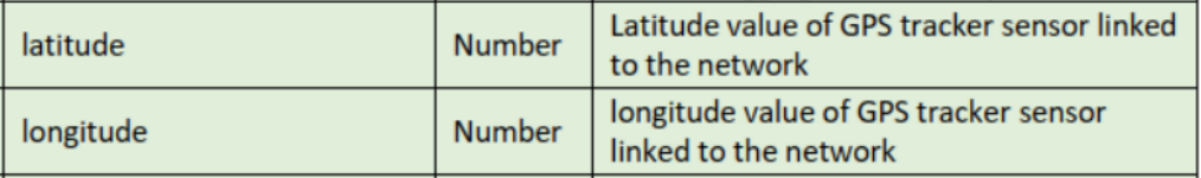

## Modbus Data
- O Modbus possuí 4 dados específicos: `FC1_Read_Input_Register`, `FC2_Read_Discrete_Value`, `FC3_Read_Holding_Register` e `FC4_Read_Coil`, que são dados numéricos, logo será utilizada a `média` para preenchimento dos espaços NaN no dataset resultante.

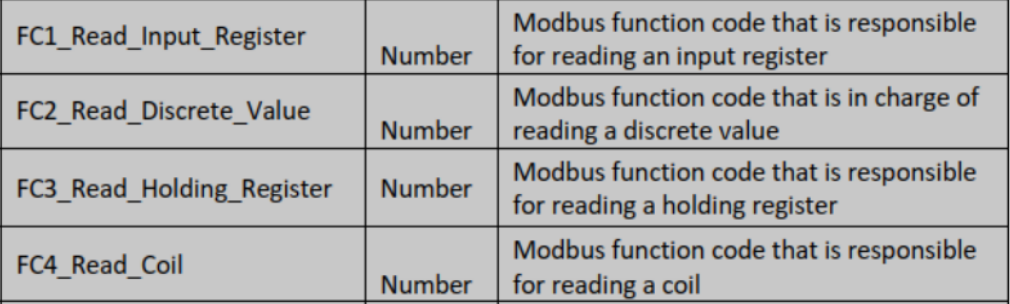

## Motion Light Data
- O sensor de luz/movimento possuí 2 dados específicos: `motion_status` e `light_status`,  que são dados numéricos e categóricos respectivamente, e o segundo é dependente do primeiro, logo será utilizada a `moda` em ambos para preenchimento dos espaços NaN no dataset resultante.

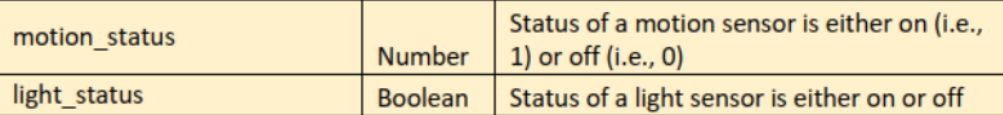

## Thermostat Data
- O termostato possuí 2 dados específicos: `current_temperature` e `thermostat_status`,  que são dados numéricos e categóricos respectivamente, logo será utilizada a `média`e  `moda` respectivamente para preenchimento dos espaços NaN no dataset resultante.

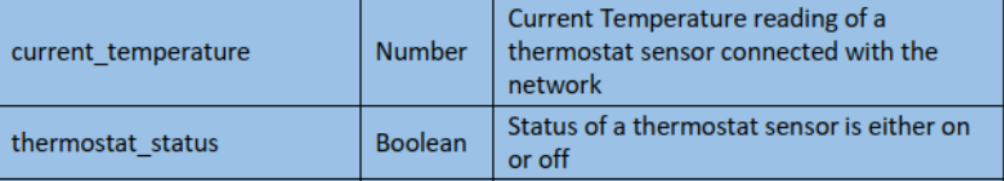

## Weather Data
- O sensor climático possuí 3 dados específicos: `temperature`, `pressure` e `humidity` ,  que são dados numéricos, logo será utilizada a `média` para preenchimento dos espaços NaN no dataset resultante.

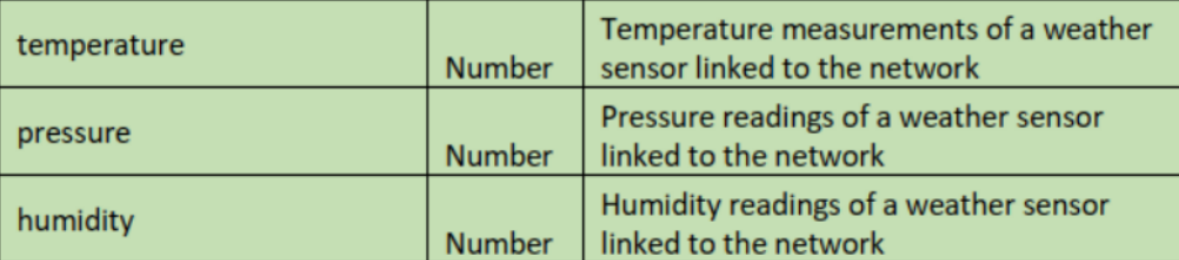

In [4]:
df = pd.read_csv('../datasets/C_Dados_V5.csv')

In [5]:
df

,ts,date,time,fridge_temperature,temp_condition,door_state,sphone_signal,latitude,longitude,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,motion_status,light_status,current_temperature,thermostat_status,temperature,pressure,humidity,label,type
0,1556245180,25-Apr-19,19:19:40,9.000000,high,closed,0,46.703771,56.840204,32757.773627,32777.699879,32503.208743,32828.110594,0,0,28.76238,1,35.378616,0.892187,48.729767,1,ddos
1,1556245180,25-Apr-19,19:19:40,9.250000,high,closed,0,46.703771,56.840204,32757.773627,32777.699879,32503.208743,32828.110594,0,0,28.76238,1,35.378616,0.892187,48.729767,1,ddos
2,1556245185,25-Apr-19,19:19:45,12.650000,high,closed,0,46.703771,56.840204,32757.773627,32777.699879,32503.208743,32828.110594,0,0,28.76238,1,35.378616,0.892187,48.729767,1,ddos
3,1556245185,25-Apr-19,19:19:45,4.650000,low,closed,0,46.703771,56.840204,32757.773627,32777.699879,32503.208743,32828.110594,0,0,28.76238,1,35.378616,0.892187,48.729767,1,ddos
4,1556245195,25-Apr-19,19:19:55,12.650000,high,closed,0,46.703771,56.840204,32757.773627,32777.699879,32503.208743,32828.110594,0,0,28.76238,1,35.378616,0.892187,48.729767,1,ddos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401114,1554166618,1-Apr-19,17:56:58,7.131876,high,closed,0,46.703771,56.840204,32757.773627,32777.699879,32503.208743,32828.110594,0,0,28.76238,1,32.799434,2.204924,37.024913,0,normal
401115,1554166618,1-Apr-19,17:56:58,7.131876,high,closed,0,46.703771,56.840204,32757.773627,32777.699879,32503.208743,32828.110594,0,0,28.76238,1,29.453781,-2.030547,90.297894,0,normal
401116,1554166619,1-Apr-19,17:56:59,7.131876,high,closed,0,46.703771,56.840204,32757.773627,32777.699879,32503.208743,32828.110594,0,0,28.76238,1,47.185992,0.872942,37.687701,0,normal
401117,1554166623,1-Apr-19,17:57:03,7.131876,high,closed,0,46.703771,56.840204,32757.773627,32777.699879,32503.208743,32828.110594,0,0,28.76238,1,43.097037,3.168207,93.647950,0,normal


In [6]:
df['type'].value_counts()/df.shape[0]

normal        0.610791
backdoor      0.087256
injection     0.087256
password      0.087256
ddos          0.062326
ransomware    0.039963
xss           0.015247
scanning      0.009905
Name: type, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401119 entries, 0 to 401118
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ts                         401119 non-null  int64  
 1   date                       401119 non-null  object 
 2   time                       401119 non-null  object 
 3   fridge_temperature         401119 non-null  float64
 4   temp_condition             401119 non-null  object 
 5   door_state                 401119 non-null  object 
 6   sphone_signal              401119 non-null  int64  
 7   latitude                   401119 non-null  float64
 8   longitude                  401119 non-null  float64
 9   FC1_Read_Input_Register    401119 non-null  float64
 10  FC2_Read_Discrete_Value    401119 non-null  float64
 11  FC3_Read_Holding_Register  401119 non-null  float64
 12  FC4_Read_Coil              401119 non-null  float64
 13  motion_status              40

In [8]:
df['type'].unique()

array(['ddos', 'backdoor', 'injection', 'normal', 'password',
       'ransomware', 'xss', 'scanning'], dtype=object)

## Processamento dos Dados
#### Dimensionamento (StandardScaler / Padronização)

Antes de fazer o preprocessamento : 
- Dividir o conjunto (evitando o vazamento' de informação durante cada etapa do processo).


In [9]:
# Removendo todas as features de tempo e o label
df.drop(['ts', 'date', 'time', 'label'], axis=1, inplace=True)

# # Criando outras features usando a data (day-month-year)
# df.date = pd.to_datetime(df.date)
# df['day'] = df.date.dt.day
# df['month'] = df.date.dt.month
# df['year'] = df.date.dt.year

# df.drop(labels=['date'], inplace=True, axis=1)
df.head()

,fridge_temperature,temp_condition,door_state,sphone_signal,latitude,longitude,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,motion_status,light_status,current_temperature,thermostat_status,temperature,pressure,humidity,type
0,9.00,high,closed,0,46.703771,56.840204,32757.773627,32777.699879,32503.208743,32828.110594,0,0,28.76238,1,35.378616,0.892187,48.729767,ddos
1,9.25,high,closed,0,46.703771,56.840204,32757.773627,32777.699879,32503.208743,32828.110594,0,0,28.76238,1,35.378616,0.892187,48.729767,ddos
2,12.65,high,closed,0,46.703771,56.840204,32757.773627,32777.699879,32503.208743,32828.110594,0,0,28.76238,1,35.378616,0.892187,48.729767,ddos
3,4.65,low,closed,0,46.703771,56.840204,32757.773627,32777.699879,32503.208743,32828.110594,0,0,28.76238,1,35.378616,0.892187,48.729767,ddos
4,12.65,high,closed,0,46.703771,56.840204,32757.773627,32777.699879,32503.208743,32828.110594,0,0,28.76238,1,35.378616,0.892187,48.729767,ddos


In [10]:
# Separando as Features do Label
y_data = df.type
X_data = df.drop(['type'], axis=1)

print("X:", X_data.shape)
X_data.head(3)

X: (401119, 17)


,fridge_temperature,temp_condition,door_state,sphone_signal,latitude,longitude,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,motion_status,light_status,current_temperature,thermostat_status,temperature,pressure,humidity
0,9.00,high,closed,0,46.703771,56.840204,32757.773627,32777.699879,32503.208743,32828.110594,0,0,28.76238,1,35.378616,0.892187,48.729767
1,9.25,high,closed,0,46.703771,56.840204,32757.773627,32777.699879,32503.208743,32828.110594,0,0,28.76238,1,35.378616,0.892187,48.729767
2,12.65,high,closed,0,46.703771,56.840204,32757.773627,32777.699879,32503.208743,32828.110594,0,0,28.76238,1,35.378616,0.892187,48.729767


In [11]:
print("y:", y_data.shape)
y_data.head(3)

y: (401119,)


0    ddos
1    ddos
2    ddos
Name: type, dtype: object

### Exemplo - Pipeline

O bloco de código a seguir realiza pré-processamento do conjunto de dados, com o objetivo de prepará-lo para treinar um modelo de aprendizado de máquina.

A primeira linha define uma lista com o nome das colunas que contêm variáveis categóricas.

Em seguida, é criado um objeto `ColumnTransformer` que irá lidar com os dados das colunas categóricas, usando a classe OrdinalEncoder para transformar esses dados em valores numéricos ordinais. O parâmetro **``remainder='passthrough'``** é usado para manter as colunas que não são categóricas inalteradas.

Por fim, criamo um objeto `Pipeline` que irá aplicar o pré-processamento aos dados. Ele consiste em dois passos:

* O primeiro passo é aplicar o ColumnTransformer criado anteriormente, que irá lidar com as colunas categóricas e manter as outras colunas sem modificação.
* O segundo passo é aplicar um StandardScaler para normalizar os valores das colunas numéricas.


O resultado é um conjunto de dados pré-processado que pode ser usado para treinar um modelo de aprendizado de máquina.

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

categorical_features = ['temp_condition', 'door_state', 'sphone_signal', 'light_status', 'thermostat_status']

cat_handle = ColumnTransformer(
                    transformers=[
                        ('cat', OrdinalEncoder(), categorical_features),
                         ], remainder='passthrough')


# Juntamos tudo; Lidando com os dados categoricos e em seguida fazendo o standardscaler
preprocessor = Pipeline(steps=[
    ('categorical', cat_handle), 
    ('numerical', StandardScaler())
])

## Divisão dos dados

Esse código está usando o objeto StratifiedShuffleSplit da biblioteca sklearn.model_selection para dividir um conjunto de dados em conjuntos de treino e teste. A divisão é feita de forma estratificada, ou seja, preservando a proporção de cada classe do conjunto de dados original nos conjuntos de treino e teste.

A classe StratifiedShuffleSplit é uma estratégia de validação cruzada que, ao contrário da validação cruzada tradicional, não faz uma partição fixa do conjunto de dados em k conjuntos. Em vez disso, ela faz várias partições aleatórias do conjunto de dados e, em cada uma delas, mantém a proporção de cada classe nos conjuntos de treino e teste. Essa abordagem é útil quando o conjunto de dados é desbalanceado, ou seja, quando algumas classes têm muito mais instâncias do que outras.

O objeto StratifiedShuffleSplit é inicializado com três parâmetros:

* `n_splits`: número de partições a serem geradas. Neste caso, é gerada apenas uma partição.
* `test_size`: proporção do conjunto de dados a ser usada como teste. Neste caso, usamos uma proporção de 0.3, o que significa que 30% das instâncias são usadas como teste.
*`random_state`: semente para o gerador de números aleatórios. Neste caso, é usada a semente 0.

O loop for é usado para iterar sobre a única partição gerada pelo objeto StratifiedShuffleSplit. Em cada iteração, ele recebe os índices das instâncias que serão usadas como treino e teste e cria dois novos conjuntos de dados (*X_train, y_train* e *X_test, y_test*) com essas instâncias. Esses conjuntos de dados são usados posteriormente para treinar e testar um modelo de aprendizado de máquina.

**Em resumo, esse código é uma forma de dividir um conjunto de dados em conjuntos de treino e teste de forma estratificada, o que pode ser útil quando o conjunto de dados é desbalanceado.**

In [13]:
y_data.unique()

array(['ddos', 'backdoor', 'injection', 'normal', 'password',
       'ransomware', 'xss', 'scanning'], dtype=object)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    shuffle=True, 
                                                    random_state=42, 
                                                    stratify=y_data)

# Reparar que está sendo usado o X_data e y_data sem passar o transform neles ainda.

In [15]:
y_train.unique()

array(['normal', 'injection', 'backdoor', 'ransomware', 'password',
       'ddos', 'xss', 'scanning'], dtype=object)

In [16]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [17]:
le.classes_

array(['backdoor', 'ddos', 'injection', 'normal', 'password',
       'ransomware', 'scanning', 'xss'], dtype=object)

# Regressão Logística

Foi adicionado algumas configurações no modelo de Regressão Logística, como max_iter, solver, C, e penalty. Além disso, o GridSearchCV é utilizado para ajustar nossos parâmetros em uma grade de valores e encontrar a melhor combinação.

Existem alguns parâmetros que você pode ajustar para uma regressão logística no scikit-learn. Aqui estão alguns exemplos:

* **`penalty`**: Especifica a norma a ser usada na regularização. Pode ser 'L1', 'L2', 'elasticnet' ou 'none'.


* **`C`**: Parâmetro de inversão de regularização. Valores menores especificam uma regularização mais forte.


* **`solver`**: Algoritmo a ser usado no problema de otimização. Pode ser 'newton-cg', 'lbfgs', 'liblinear', 'sag' ou 'saga'.


* **`max_iter`**: Número máximo de iterações para o solucionador convergir.


* **`multi_class`**: Especifica o esquema de classificação multiclasse. Pode ser 'ovr' (one-vs-rest) ou 'multinomial'.


* **`class_weight`**: Peso atribuído a cada classe. Pode ser 'balanced' ou um dicionário com pesos personalizados.

In [18]:
inicio_rl = time.time()

In [19]:
from sklearn.feature_selection import SelectFromModel

# A variavel 'pipeline', contem a etapa de preprocesamento e o modelo, além do feature selection
pipeline = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', LogisticRegression())
])

param_grid_LR = {
                'feature_selection__max_features': [1,2,3],
                'classificador__penalty': ['l1', 'l2'],
                'classificador__C': [0.1, 1.0, 10.0],
                'classificador__solver': ['newton-cg', 'saga'],
                'classificador__max_iter': [100, 1000],
                'classificador__multi_class': ['ovr', 'multinomial'],
                'classificador__class_weight': ['balanced']}

# Repare que o param_grid é passado o nome do classifier dois underscore 
# antes do parametro assim: nomeclassificador__parametro. O nome é passado na string do pipeline
# no caso deixei 'classificador' mesmo.
grid_search = GridSearchCV(pipeline, param_grid=param_grid_LR, cv=5, n_jobs=-1, refit=True)

A função GridSearchCV da biblioteca sklearn.model_selection possui diversos parâmetros que podem ser utilizados para controlar o processo de busca de hiperparâmetros e a validação cruzada. Abaixo estão listados os principais parâmetros:

* **`estimator`**: representa o modelo a ser otimizado e deve ser uma instância de um estimador do scikit-learn.


* **`param_grid`**: um dicionário que mapeia nomes de parâmetros do modelo para listas de valores a serem explorados durante a busca de hiperparâmetros.


* **`scoring`**: uma métrica de avaliação que será utilizada para avaliar o desempenho do modelo. Deve ser uma string que representa o nome da métrica ou uma função que calcula a métrica. Por padrão, é utilizado o score da função score() do estimador.


* **`cv`**: número de partições a serem utilizadas na validação cruzada.


* **`n_jobs`**: número de trabalhos em paralelo a serem executados. Se n_jobs=-1, todos os processadores disponíveis serão utilizados.


* **`verbose`**: nível de verbosidade do output.


* **`pre_dispatch`**: número de trabalhos que devem ser despachados para o trabalhador antes que o próximo lote de tarefas seja despachado. O valor padrão é 2 * n_jobs.


* **`return_train_score`**: se True, inclui o score de treino para cada combinação de parâmetros no resultado. O valor padrão é False.


* **`refit`**: se True, refita o modelo com os melhores parâmetros encontrados usando todos os dados disponíveis. O valor padrão é True.


* **`iid`**: se True, assume que as dobras de validação cruzada são independentes e identicamente distribuídas (i.i.d.), o que não é garantido para todos os tipos de dados. O valor padrão é True.


* **`error_score`**: valor a ser atribuído ao score caso ocorra algum erro na validação cruzada.


* **`return_estimator`**: se True, retorna os estimadores que foram ajustados para cada combinação de parâmetros. O valor padrão é False.

In [20]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['temp_condition',
                                                                                           'door_state',
                                                                                           'sphone_signal',
                                                                                           'light_status',
                                                                                           'thermostat_status'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomF...
                                       ('classificador',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classificador__C': [0.1, 1.0, 10.0],
                         'classificador__class_weight': ['balanced'],
                         'classificador__max_iter': [100, 1000],
                         'classificador__multi_class': ['ovr', 'multinomial'],
                         'classificador__penalty': ['l1', 'l2'],
                         'classificador__solver': ['newton-cg', 'saga'],
                         'feature_selection__max_features': [1, 2, 3]})

In [21]:
X_train

,fridge_temperature,temp_condition,door_state,sphone_signal,latitude,longitude,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,motion_status,light_status,current_temperature,thermostat_status,temperature,pressure,humidity
226571,7.131876,high,closed,0,46.703771,56.840204,57037.000000,62940.000000,49229.000000,21007.000000,0,0,28.762380,1,35.378616,0.892187,48.729767
298207,7.131876,high,closed,0,46.703771,56.840204,32757.773627,32777.699879,32503.208743,32828.110594,0,0,28.925837,1,35.378616,0.892187,48.729767
155589,7.131876,high,closed,0,0.265215,10.126594,32757.773627,32777.699879,32503.208743,32828.110594,0,0,28.762380,1,35.378616,0.892187,48.729767
341160,7.131876,high,closed,0,46.703771,56.840204,32757.773627,32777.699879,32503.208743,32828.110594,0,0,30.186831,1,35.378616,0.892187,48.729767
118455,7.131876,high,closed,0,46.703771,56.840204,32757.773627,32777.699879,32503.208743,32828.110594,0,0,28.762380,1,35.378616,0.892187,48.729767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310620,7.131876,high,closed,0,46.703771,56.840204,32757.773627,32777.699879,32503.208743,32828.110594,0,0,30.866047,1,35.378616,0.892187,48.729767
267017,7.131876,high,closed,0,46.703771,56.840204,32757.773627,32777.699879,32503.208743,32828.110594,1,1,28.762380,1,35.378616,0.892187,48.729767
344200,7.131876,high,closed,0,46.703771,56.840204,32757.773627,32777.699879,32503.208743,32828.110594,0,0,28.762380,1,36.803209,0.450684,97.028388
179506,7.131876,high,closed,0,46.703771,56.840204,45120.000000,14639.000000,63960.000000,59276.000000,0,0,28.762380,1,35.378616,0.892187,48.729767


In [22]:
y_train

array([3, 3, 3, ..., 0, 0, 4])

In [23]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__C': 0.1, 'classificador__class_weight': 'balanced', 'classificador__max_iter': 100, 'classificador__multi_class': 'ovr', 'classificador__penalty': 'l1', 'classificador__solver': 'saga', 'feature_selection__max_features': 3}


In [24]:
# Essas métricas são do conjunto de validação (é pra ver como o modelo se comportou) 
# O std_score é o desvio padrão (O valor tende a ser baixo)
# Não é necessário mostrar métricas de valição ou treino. 
# O que importa é a metrica no TESTE.
# O gridsearch faz a validação cruzado k-fold, o cv=5 são 5 folds.
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.57289 +- 0.00517


In [25]:
# Aqui é realizada a predição.
# O gridsearch possui um paramentro chamado refit 
#quando eles está true quer dizer que o modelo JÁ É treinado com os melhores parametros, por isso já dou um predict direto

y_pred = grid_search.predict(X_test)

In [26]:
fim_rl = time.time()

In [27]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.11      0.16      8750
           1       0.03      0.00      0.00      6250
           2       0.37      0.06      0.10      8750
           3       0.63      0.91      0.74     61250
           4       0.10      0.07      0.08      8750
           5       0.18      0.04      0.07      4008
           6       0.12      0.13      0.13       993
           7       0.00      0.00      0.00      1529

    accuracy                           0.58    100280
   macro avg       0.22      0.16      0.16    100280
weighted avg       0.46      0.58      0.49    100280



In [28]:
print("Tempo execução RL:", fim_rl - inicio_rl)

Tempo execução RL: 6040.279575109482


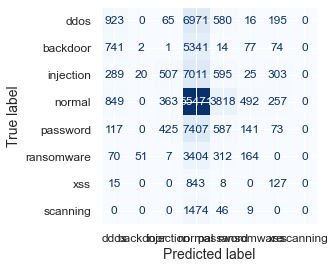

In [29]:
# matrix de confusão. Apenas do teste
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=['ddos', 'backdoor', 'injection', 'normal', 'password',
       'ransomware', 'xss', 'scanning'], 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

# KNeighborsClassifier

Existem vários parâmetros que podem ser ajustados para o modelo KNN usando a busca em grade (GridSearchCV). Esses são alguns dos principais parâmetros que podem ser incluídos no dicionário param_grid:

* **`n_neighbors`**: Número de vizinhos mais próximos a serem considerados. É um parâmetro obrigatório do modelo KNN. 


* **`weights`**: Método de ponderação dos vizinhos próximos. Os valores possíveis são "uniform" (ponderação uniforme) ou "distance" (ponderação pela inversa da distância).


* **`algorithm`**: Algoritmo a ser usado para encontrar os vizinhos próximos. Os valores possíveis são "auto" (o algoritmo escolhe o mais apropriado com base nos dados), "ball_tree" (utiliza uma estrutura de dados de árvore para acelerar a busca) ou "kd_tree" (utiliza uma estrutura de dados de árvore k-dimensionais para acelerar a busca).


* **`leaf_size`**: Tamanho da folha a ser usado na estrutura de dados da árvore. Isso afeta a velocidade e a memória necessárias para construir a árvore.


* **`p`**: Parâmetro de potência a ser usado na métrica de distância de Minkowski. Se p=1, a distância de Manhattan é usada. Se p=2, a distância euclidiana é usada.


* **`metric`**: Métrica de distância a ser usada para medir a distância entre os pontos. Os valores possíveis são "euclidean", "manhattan", "chebyshev", "minkowski" (usado com o parâmetro p) e outras métricas personalizadas.

In [30]:
inicio_knn = time.time()

In [31]:
from sklearn.feature_selection import SelectFromModel

pipeline_knn = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', KNeighborsClassifier())
])

param_grid_KNN = {
                'feature_selection__max_features': [1,2,3],
                'classificador__n_neighbors': [1, 3, 5, 7, 9],
                'classificador__metric': ['euclidean', 'manhatan', 'chebyshev', 'minkowski']}

grid_search = GridSearchCV(pipeline_knn, param_grid=param_grid_KNN, cv=5, n_jobs=-1, refit=True)

In [32]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['temp_condition',
                                                                                           'door_state',
                                                                                           'sphone_signal',
                                                                                           'light_status',
                                                                                           'thermostat_status'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classificador__metric': ['euclidean', 'manhatan',
                                                   'chebyshev', 'minkowski'],
                         'classificador__n_neighbors': [1, 3, 5, 7, 9],
                         'feature_selection__max_features': [1, 2, 3]})

In [33]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__metric': 'chebyshev', 'classificador__n_neighbors': 9, 'feature_selection__max_features': 3}


In [34]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.57284 +- 0.15414


In [35]:
y_pred = grid_search.predict(X_test)

In [36]:
fim_knn = time.time()

In [37]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.12      0.21      8750
           1       0.77      0.16      0.27      6250
           2       0.73      0.12      0.21      8750
           3       0.65      0.99      0.78     61250
           4       0.70      0.09      0.16      8750
           5       0.69      0.10      0.18      4008
           6       0.99      0.14      0.24       993
           7       0.51      0.02      0.03      1529

    accuracy                           0.65    100280
   macro avg       0.72      0.22      0.26    100280
weighted avg       0.68      0.65      0.56    100280



In [38]:
minutes, seconds = divmod(fim_knn, 60)

print("--- KNN %d minutes %d seconds ---" % (minutes, seconds))

Tempo execução KNN: 4150.536506891251


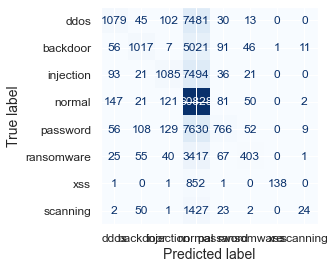

In [39]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=['ddos', 'backdoor', 'injection', 'normal', 'password',
       'ransomware', 'xss', 'scanning'], 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine Gradient Boosting Master

* **`learning_rate`**: Taxa de aprendizado do algoritmo.


* **`n_estimators`**: Número de estimadores no algoritmo.


* **`max_depth`**: Profundidade máxima das árvores de decisão.


* **`min_samples_split`**: Número mínimo de amostras necessárias para dividir um nó interno.


* **`min_samples_leaf`**: Número mínimo de amostras necessárias em uma folha.


* **`max_features`**: Número máximo de recursos considerados para dividir um nó.


* **`subsample`**: Fração de amostras usadas para treinar cada árvore.

In [40]:
inicio_gbm = time.time()

In [41]:
pipeline_gbm = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', GradientBoostingClassifier())
])

param_grid_GBM = {
    'feature_selection__max_features': [1,2,3],
    'classificador__learning_rate': [0.1, 0.05],
    'classificador__n_estimators': [50, 100],
    'classificador__max_depth': [2, 3],
    'classificador__min_samples_split': [2, 4],
    'classificador__min_samples_leaf': [1, 2],
    'classificador__max_features': ['auto', 'sqrt'],
    'classificador__subsample': [0.8, 1.0]}

grid_search = GridSearchCV(pipeline_gbm, param_grid=param_grid_GBM, cv=5, n_jobs=-1, refit=True)

In [42]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['temp_condition',
                                                                                           'door_state',
                                                                                           'sphone_signal',
                                                                                           'light_status',
                                                                                           'thermostat_status'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomF...
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'classificador__learning_rate': [0.1, 0.05],
                         'classificador__max_depth': [2, 3],
                         'classificador__max_features': ['auto', 'sqrt'],
                         'classificador__min_samples_leaf': [1, 2],
                         'classificador__min_samples_split': [2, 4],
                         'classificador__n_estimators': [50, 100],
                         'classificador__subsample': [0.8, 1.0],
                         'feature_selection__max_features': [1, 2, 3]})

In [43]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__learning_rate': 0.1, 'classificador__max_depth': 3, 'classificador__max_features': 'auto', 'classificador__min_samples_leaf': 1, 'classificador__min_samples_split': 2, 'classificador__n_estimators': 100, 'classificador__subsample': 1.0, 'feature_selection__max_features': 3}


In [44]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.63152 +- 0.00068


In [45]:
y_pred = grid_search.predict(X_test)

In [46]:
fim_gbm = time.time()

In [47]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.04      0.08      8750
           1       0.67      0.12      0.20      6250
           2       0.44      0.07      0.12      8750
           3       0.64      0.99      0.78     61250
           4       0.39      0.04      0.07      8750
           5       0.39      0.11      0.17      4008
           6       0.87      0.13      0.22       993
           7       0.00      0.00      0.00      1529

    accuracy                           0.63    100280
   macro avg       0.49      0.19      0.20    100280
weighted avg       0.57      0.63      0.52    100280



In [48]:
minutes, seconds = divmod(fim_gbm, 60)

print("--- GBM %d minutes %d seconds ---" % (minutes, seconds))

Tempo execução GBM: 30991.316648721695


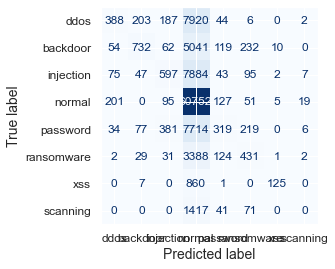

In [49]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=['ddos', 'backdoor', 'injection', 'normal', 'password',
       'ransomware', 'xss', 'scanning'], 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

# Nayve Bayes BernoulliNB

A função BernoulliNB() tem apenas um hiperparâmetro para ajuste:

* `alpha`: parâmetro de suavização Laplace. Quanto maior o valor de alpha, maior é a suavização aplicada.

In [50]:
inicio_nb = time.time()

In [51]:
pipeline_nb = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', BernoulliNB())
])

param_grid_NB = {
    'feature_selection__max_features': [1,2,3],
    'classificador__alpha': [0.1, 0.5, 1.0]}

grid_search = GridSearchCV(pipeline_nb, param_grid=param_grid_NB, cv=5, n_jobs=-1, refit=True)

In [52]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['temp_condition',
                                                                                           'door_state',
                                                                                           'sphone_signal',
                                                                                           'light_status',
                                                                                           'thermostat_status'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador', BernoulliNB())]),
             n_jobs=-1,
             param_grid={'classificador__alpha': [0.1, 0.5, 1.0],
                         'feature_selection__max_features': [1, 2, 3]})

In [53]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__alpha': 0.1, 'feature_selection__max_features': 1}


In [54]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.61079 +- 0.00000


In [55]:
y_pred = grid_search.predict(X_test)

In [56]:
fim_nb = time.time()

In [57]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8750
           1       0.00      0.00      0.00      6250
           2       0.00      0.00      0.00      8750
           3       0.61      1.00      0.76     61250
           4       0.00      0.00      0.00      8750
           5       0.00      0.00      0.00      4008
           6       0.00      0.00      0.00       993
           7       0.00      0.00      0.00      1529

    accuracy                           0.61    100280
   macro avg       0.08      0.12      0.09    100280
weighted avg       0.37      0.61      0.46    100280



In [58]:
minutes, seconds = divmod(fim_nb, 60)

print("--- NB %d minutes %d seconds ---" % (minutes, seconds))

Tempo execução NB: 322.80586314201355


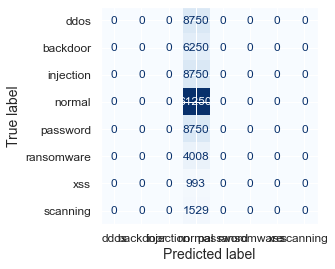

In [59]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=['ddos', 'backdoor', 'injection', 'normal', 'password',
       'ransomware', 'xss', 'scanning'], 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

# PipeLine Linear Discriminant Analysis

Aqui estão os principais parâmetros que podemos ajustar:

* **`solver`**: Algoritmo usado para encontrar a solução. Possíveis valores são svd, lsqr ou eigen.


* **`shrinkage`**: Parâmetro de encolhimento utilizado para melhorar a estabilidade da estimativa. Possíveis valores são None, auto ou um valor float entre 0 e 1.


* **`tol`**: Tolerância para a convergência do algoritmo. Padrão é 1e-4.


* **`n_components`**: Número de componentes para manter. O padrão é manter todas as componentes.


* **`priors`**: Probabilidades a priori de cada classe. Se None, as probabilidades são ajustadas de acordo com os dados.


* **`store_covariance`**: Se verdadeiro, armazena a matriz de covariância empírica de cada classe. Padrão é False.

In [60]:
inicio_lda = time.time()

In [61]:
pipeline_lda = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', LinearDiscriminantAnalysis())
])

param_grid_LDA = {
    'feature_selection__max_features': [1,2,3],
    'classificador__solver': ['svd', 'lsqr', 'eigen']}

grid_search = GridSearchCV(pipeline_lda, param_grid=param_grid_LDA, cv=5, n_jobs=-1, refit=True)

In [62]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['temp_condition',
                                                                                           'door_state',
                                                                                           'sphone_signal',
                                                                                           'light_status',
                                                                                           'thermostat_status'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        LinearDiscriminantAnalysis())]),
             n_jobs=-1,
             param_grid={'classificador__solver': ['svd', 'lsqr', 'eigen'],
                         'feature_selection__max_features': [1, 2, 3]})

In [63]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__solver': 'eigen', 'feature_selection__max_features': 2}


In [64]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.61214 +- 0.00022


In [65]:
y_pred = grid_search.predict(X_test)

In [66]:
fim_lda = time.time()

In [67]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8750
           1       0.48      0.08      0.14      6250
           2       0.00      0.00      0.00      8750
           3       0.61      0.99      0.76     61250
           4       0.00      0.00      0.00      8750
           5       0.00      0.00      0.00      4008
           6       0.00      0.00      0.00       993
           7       0.00      0.00      0.00      1529

    accuracy                           0.61    100280
   macro avg       0.14      0.13      0.11    100280
weighted avg       0.40      0.61      0.47    100280



In [68]:
minutes, seconds = divmod(fim_lda, 60)

print("--- LDA %d minutes %d seconds ---" % (minutes, seconds))

Tempo execução LDA: 319.3951418399811


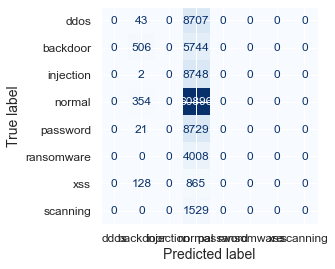

In [69]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=['ddos', 'backdoor', 'injection', 'normal', 'password',
       'ransomware', 'xss', 'scanning'], 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

# DecisionTreeClassifier

Aqui estão alguns dos parâmetros mais comuns que podemos incluir no param_grid para o DecisionTreeClassifier:

* **`criterion`**: critério de divisão usado na árvore de decisão. As opções são gini ou entropy.


* **`max_depth`**: profundidade máxima da árvore de decisão. Um valor mais alto permitirá que a árvore de decisão tenha mais níveis, o que pode levar a uma melhor precisão, mas também pode levar a um maior risco de sobreajuste.


* **`min_samples_split`**: o número mínimo de amostras necessárias para dividir um nó. Isso ajuda a evitar divisões que levam a subárvores muito pequenas.


* **`min_samples_leaf`**: o número mínimo de amostras necessárias em uma folha. Isso ajuda a evitar folhas que contenham muito poucas amostras.


* **`max_features`**: o número máximo de recursos a serem considerados para cada divisão. Isso pode ajudar a reduzir o risco de sobreajuste.


* **`class_weight`**: pesos associados a cada classe. Isso pode ser útil para lidar com conjuntos de dados desbalanceados.

In [70]:
inicio_dt = time.time()

In [71]:
pipeline_dtc = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', DecisionTreeClassifier())
])

param_grid_DTC = {
    'feature_selection__max_features': [1,2,3],
    'classificador__criterion': ['gini', 'entropy'],
    'classificador__max_depth': [2, 4, 6],
    'classificador__min_samples_split': [2, 5, 10],
    'classificador__min_samples_leaf': [1, 2, 4],
    'classificador__max_features': ['sqrt', 'log2'],
    'classificador__class_weight': [None, 'balanced']}

grid_search = GridSearchCV(pipeline_dtc, param_grid=param_grid_DTC, cv=5, n_jobs=-1, refit=True)

In [72]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['temp_condition',
                                                                                           'door_state',
                                                                                           'sphone_signal',
                                                                                           'light_status',
                                                                                           'thermostat_status'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomF...
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'classificador__class_weight': [None, 'balanced'],
                         'classificador__criterion': ['gini', 'entropy'],
                         'classificador__max_depth': [2, 4, 6],
                         'classificador__max_features': ['sqrt', 'log2'],
                         'classificador__min_samples_leaf': [1, 2, 4],
                         'classificador__min_samples_split': [2, 5, 10],
                         'feature_selection__max_features': [1, 2, 3]})

In [73]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__class_weight': None, 'classificador__criterion': 'entropy', 'classificador__max_depth': 6, 'classificador__max_features': 'log2', 'classificador__min_samples_leaf': 1, 'classificador__min_samples_split': 5, 'feature_selection__max_features': 3}


In [74]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.62537 +- 0.00038


In [75]:
y_pred = grid_search.predict(X_test)

In [76]:
fim_dt = time.time()

In [77]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.00      0.00      8750
           1       0.46      0.10      0.17      6250
           2       0.26      0.13      0.18      8750
           3       0.64      0.97      0.77     61250
           4       0.29      0.03      0.05      8750
           5       0.38      0.08      0.13      4008
           6       0.00      0.00      0.00       993
           7       0.00      0.00      0.00      1529

    accuracy                           0.62    100280
   macro avg       0.28      0.16      0.16    100280
weighted avg       0.50      0.62      0.51    100280



In [78]:
minutes, seconds = divmod(fim_dt, 60)

print("--- DT %d minutes %d seconds ---" % (minutes, seconds))

Tempo execução DT: 20293.712131738663


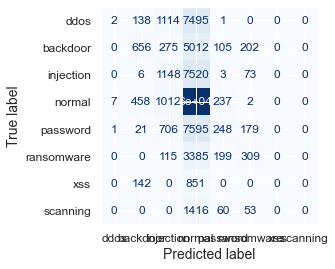

In [79]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=['ddos', 'backdoor', 'injection', 'normal', 'password',
       'ransomware', 'xss', 'scanning'], 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()